<a href="https://colab.research.google.com/github/hansa31/e17-co328-Flood-Forecasting-System-1/blob/main/ML/TimeSeriesForecastingTFtutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False


In [ ]:
# the weather dataset
# contains 14 features (temperature, atmoshperic pressure etc.) collected every 10 minutes (2009-2016)

zip_path = tf.keras.utils.get_file(
    origin = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True
)

csv_path, _ = os.path.splitext(zip_path)


13582336/13568290 [==============================] - 0s 0us/step


In [ ]:
# get only hourly predictions

df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
df = df[5::6]
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [ ]:
df.shape

(70091, 15)

In [ ]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
date_time

5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 70091, dtype: datetime64[ns]

In [ ]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


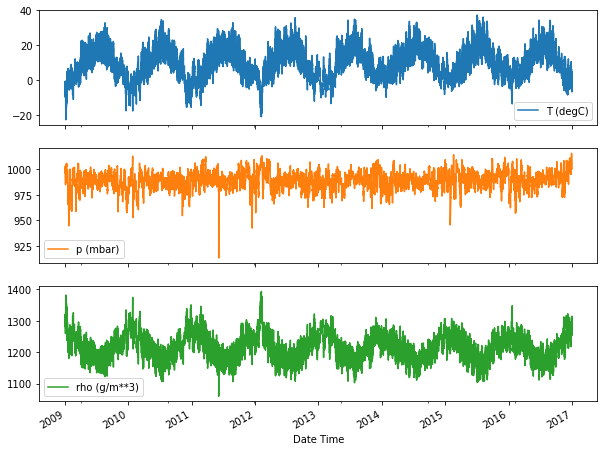

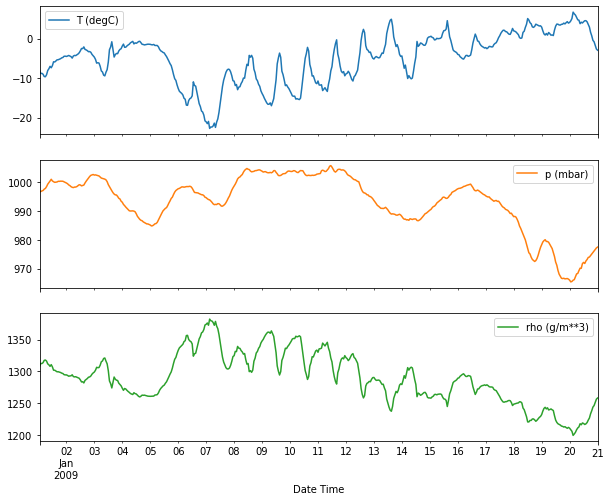

In [ ]:
# evolution of few features over time
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features =df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True,figsize=(10,8))

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True,figsize=(10,8))

In [ ]:
df.shape

(70091, 14)

In [ ]:
# looking at the statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [ ]:
# correct erroneous data in wind
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
df['wv (m/s)'].min()

0.0

Text(0, 0.5, 'Wind Velocity [m/s]')

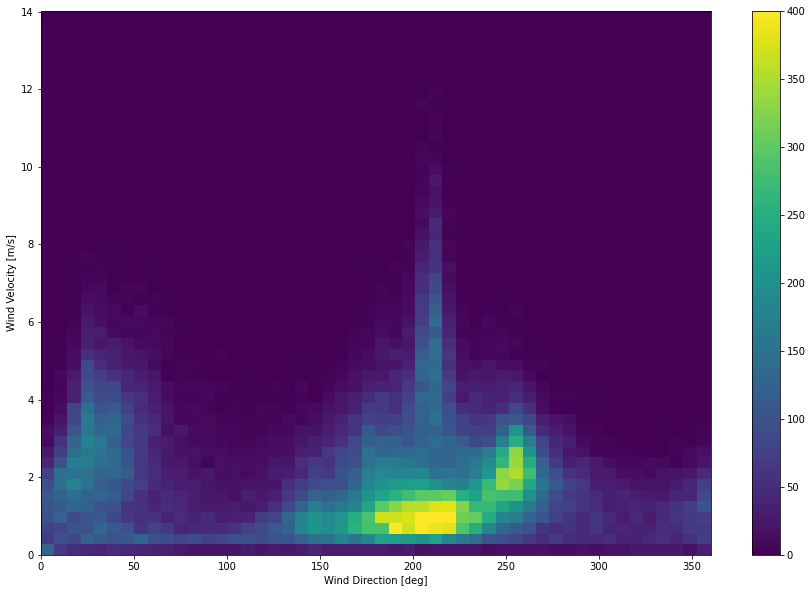

In [ ]:
# Feature engineering (to pass the model appropriately formatted data)

# example
# wind direction (360/0 should be close to eachother)
# distribution of the wind data 

plt.figure(figsize=(15,10))
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50,50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [ ]:
# this will be easier if you convert wind direction and velocity to a wind vector

wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

#Convert to radians
wd_rad = df.pop('wd (deg)')*np.pi/180

#Calculate the wind x & y components
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

#Calculate the max wind x & y
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

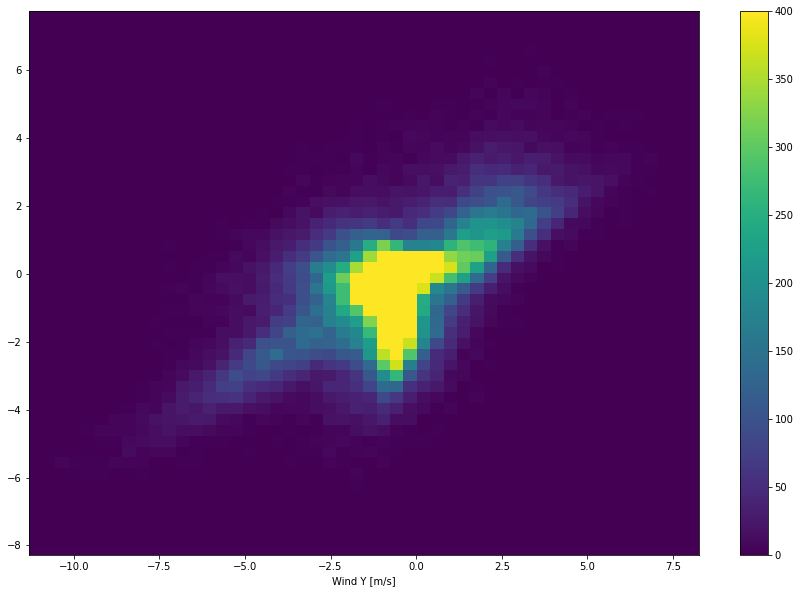

In [ ]:
# plot the wind vector

plt.figure(figsize=(15,10))
plt.hist2d(df['Wx'],df['Wy'], bins=(50,50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.xlabel('Wind Y [m/s]')
ax = plt.gca()    #get current axes on the current figure
ax.axis('tight')  #Set limits just large enough to show all data, then disable further autoscaling.

In [ ]:
# Feature eng. cont.
# Time data

# convert from string to seconds
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

5         1.230772e+09
11        1.230775e+09
17        1.230779e+09
23        1.230782e+09
29        1.230786e+09
              ...     
420521    1.483211e+09
420527    1.483215e+09
420533    1.483219e+09
420539    1.483222e+09
420545    1.483226e+09
Name: Date Time, Length: 70091, dtype: float64

In [ ]:
# But time in seconds is not useful for the model.
# being weather data, it has clear daily and yearly periodicity.
# therefore get usable signals by using sine and cosine transforms

day = 24*60*60
year = (365.2425)*day

# omega (frequencies)
df['Day sin'] = np.sin(timestamp_s * (2*np.pi/day))
df['Day cos'] = np.cos(timestamp_s*(2*np.pi/day))

df['Year sin'] = np.sin(timestamp_s * (2*np.pi/year))
df['Year cos'] = np.cos(timestamp_s*(2*np.pi/year))

# This gives the model acess to the most important frequency features


Text(0.5, 1.0, 'Time of day signal')

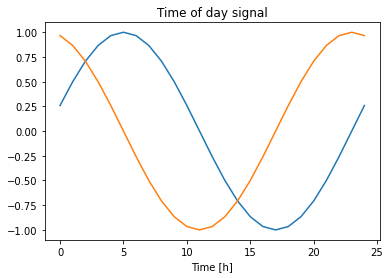

In [ ]:
# plot time of day signal
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

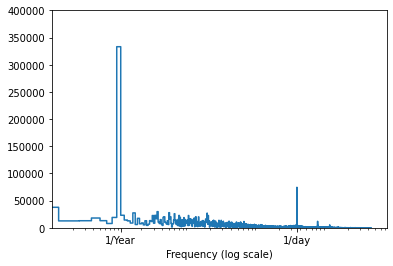

In [ ]:
# In time we knew which frequencies were important
# but for other cases, you can determine which frequencis are importnat by extracting features with FFT
# example - Temperature
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0,len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

# frequency peaks at 1/year and 1/day

In [ ]:
# split the data --> training, validation and test
# (data is not being randomly shuffled before spliting) -> to chop data into windows of consecutive samples

column_indices = {name: i for i, name in enumerate(df.columns)}   

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7): int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

test_df


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
378491,1001.93,2.80,275.81,1.25,89.50,7.47,6.69,0.78,4.16,6.68,1261.61,2.674455,1.336933,3.908819,1.953979,-8.660254e-01,0.500000,0.937670,0.347527
378497,1002.38,2.75,275.72,0.67,86.10,7.45,6.41,1.04,3.99,6.40,1262.54,2.836975,0.944286,4.943357,1.645394,-7.071068e-01,0.707107,0.937919,0.346855
378503,1002.63,2.46,275.41,0.46,86.60,7.29,6.32,0.98,3.93,6.30,1264.24,2.748864,1.298208,3.553630,1.678276,-5.000000e-01,0.866025,0.938167,0.346183
378509,1002.48,1.93,274.90,0.82,92.30,7.03,6.48,0.54,4.03,6.47,1266.37,1.506908,1.919070,2.352999,2.996580,-2.588190e-01,0.965926,0.938415,0.345510
378515,1002.42,1.87,274.84,0.76,92.30,6.99,6.45,0.54,4.01,6.44,1266.63,3.037622,1.614452,4.565263,2.426371,-1.801868e-12,1.000000,0.938662,0.344837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,-0.855154,-0.160038,-1.336792,-0.250174,-9.537170e-01,0.300706,0.006900,0.999976
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,-0.716196,-0.726267,-1.348134,-1.367090,-8.433914e-01,0.537300,0.007617,0.999971
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,-0.661501,0.257908,-1.453438,0.566672,-6.755902e-01,0.737277,0.008334,0.999965
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,-0.280621,-0.209169,-0.545207,-0.406385,-4.617486e-01,0.887011,0.009050,0.999959


In [ ]:
# Normalize data

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean)/ train_std
val_df = (val_df - train_mean)/ train_std
test_df = (test_df - train_mean)/ train_std

test_df


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
378491,1.599724,-0.728855,-0.846438,-0.480418,0.821124,-0.764821,-0.633744,-0.667960,-0.656453,-0.654069,1.089310,1.623820,1.106908,1.557556,1.016688,-1.224696,0.707179,1.262942,0.511342
378497,1.653958,-0.734632,-0.856754,-0.563604,0.615753,-0.767420,-0.700280,-0.613992,-0.720093,-0.719796,1.112016,1.704558,0.855454,1.888362,0.898892,-0.999946,1.000059,1.263298,0.510397
378503,1.684087,-0.768139,-0.892285,-0.593724,0.645954,-0.788214,-0.721666,-0.626446,-0.742555,-0.743270,1.153523,1.660785,1.082109,1.443980,0.911444,-0.707046,1.224794,1.263652,0.509452
378509,1.666010,-0.829376,-0.950739,-0.542091,0.990254,-0.822003,-0.683646,-0.717775,-0.705119,-0.703364,1.205528,1.043796,1.479713,1.060063,1.414679,-0.365957,1.366069,1.264006,0.508506
378515,1.658778,-0.836308,-0.957616,-0.550696,0.990254,-0.827201,-0.690775,-0.717775,-0.712606,-0.710407,1.211876,1.804237,1.284633,1.767462,1.197013,0.000077,1.414255,1.264359,0.507561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1.629854,-1.165600,-1.281981,-1.428459,-0.235937,-0.996148,-1.251577,-0.499831,-1.262910,-1.264390,1.555401,-0.129648,0.148238,-0.119794,0.175300,-1.348713,0.425346,-0.065547,1.428472
420527,1.535849,-1.214127,-1.322097,-1.640728,-0.580840,-1.019541,-1.356133,-0.443788,-1.363986,-1.365328,1.583967,-0.060615,-0.214379,-0.123420,-0.251059,-1.192686,0.759926,-0.064524,1.428464
420533,1.510540,-1.370107,-1.475683,-1.649333,-0.181573,-1.087119,-1.358509,-0.549647,-1.367729,-1.370023,1.734122,-0.033443,0.415894,-0.157093,0.487113,-0.955374,1.042725,-0.063501,1.428456
420539,1.445460,-1.386283,-1.487144,-1.685190,-0.217815,-1.094917,-1.375143,-0.545496,-1.382704,-1.384107,1.734366,0.155773,0.116774,0.133325,0.115670,-0.652949,1.254471,-0.062478,1.428447


In [ ]:
# plot the normalized data
df_std = (df-train_mean)/train_std
df_std = df_std.melt(var_name = 'Column',value_name='Normalized')
df_std

,Column,Normalized
0,p (mbar),0.945308
1,p (mbar),0.959770
2,p (mbar),0.986284
3,p (mbar),1.004362
4,p (mbar),1.061006
...,...,...
1331724,Year cos,1.428472
1331725,Year cos,1.428464
1331726,Year cos,1.428456
1331727,Year cos,1.428447


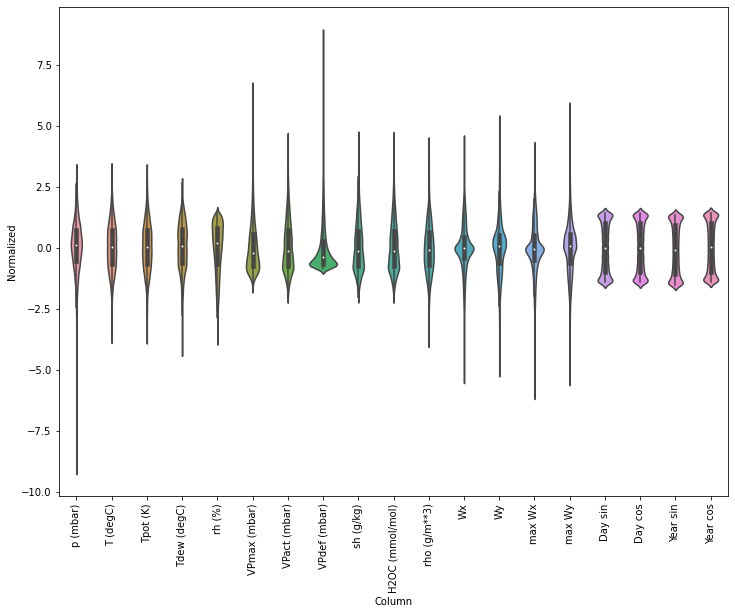

In [ ]:
plt.figure(figsize=(12,9))
ax = sns.violinplot(x='Column', y= 'Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
# Data windowing

# the models will make a set of predictions based on a window of consecutive samples of data
# main features of input windows --> number of time steps (width) of the input and label windows/ time offset/ which features are used
# depending on the task and type of model you may want to generate a variety of data windows.
# ex1- to make a single prediction 24 hours into the future, given 24 hours of history [t=0..t=23|t=24...t=47]    --> [InputWidth(24)|offset(24)]
# ex2- to make a prediction one hour into the future, given 6 hours of history [t=0...t=5|t=6]    --> [InputWidth(6)|offset(1)]

# make a WindowGenerator class. This class can,
# handle indexes and offsets
# split windows of features into (features, labels) pairs
# plot the content of the resulting windows
# efficiently generate batches of these windows from the training, evaluation and test data using tf.data.Dataset

# 1. Handeling indices and offsets
class WindowGenerator():
  def __init__(self,
               input_width,
               label_width,
               shift,
               train_df = train_df,
               val_df=val_df,
               test_df=test_df,
               label_columns=None):
    
    #Store the raw data
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    #Workout the label column indices
    self.label_columns = label_columns

    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}

    self.column_indices = {name: i for i, name in enumerate(train_df.columns)}    

    #Workout the window parameters
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width +shift

    self.input_slice = slice(0,input_width)   # returns a slice object that is used to slice any sequence (start(optional),stop,step(optional))
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]    #slicing happens here

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start,None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]   #slicing happens here

  #method to represent a Window
  def __repr__(self):
    return '\n'.join([
                      f'Total widow size: {self.total_window_size}',
                      f'Input indices: {self.input_indices}',
                      f'Label indices: {self.label_indices}',
                      f'Label column name(s): {self.label_columns}'
    ])
                                     

In [ ]:
# example windows of above class
# to make a single prediction 24 hours into the future, given 24 hours of history
w1 = WindowGenerator(input_width=24,label_width=1,shift=24,label_columns=['T (degC)'])
w1

Total widow size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

In [ ]:
# to make a prediction one hour into the future, given 6 hours of history
w2 = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns=['T (degC)'])
w2

Total widow size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

In [ ]:
# spliting 
# ex:- to make a prediction one hour into the future, given 6 hours of history --> input = [t=0..t=5] labels = [t=6]
# this method will convert them to a window of inputs and window of labels (fatures --> can handle single output and multi output)

def split_window(self, features):
  inputs = features[:,self.input_slice,:]
  labels = features[:, self.labels_slice, :]

  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),     # 0-7
                           np.array(train_df[100:100 + w2.total_window_size]),  #100-107
                           np.array(train_df[200:200 + w2.total_window_size])]) #200-207

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

# this code took a batch of 3, 7-time step windows with 19 features at each time step.
# it splits them into a batch of 6-time step 19 feature inputs,
# and a 1 time step  1 feature label

All shapes are: (batch, time, features)
Window shape: (3, 7, 19)
Inputs shape: (3, 6, 19)
Labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

In [ ]:
# poltting method
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):      # 'T (degC)' is the prediciton
  inputs, labels = self.example   #create example here
  plt.figure(figsize=(15, 10))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

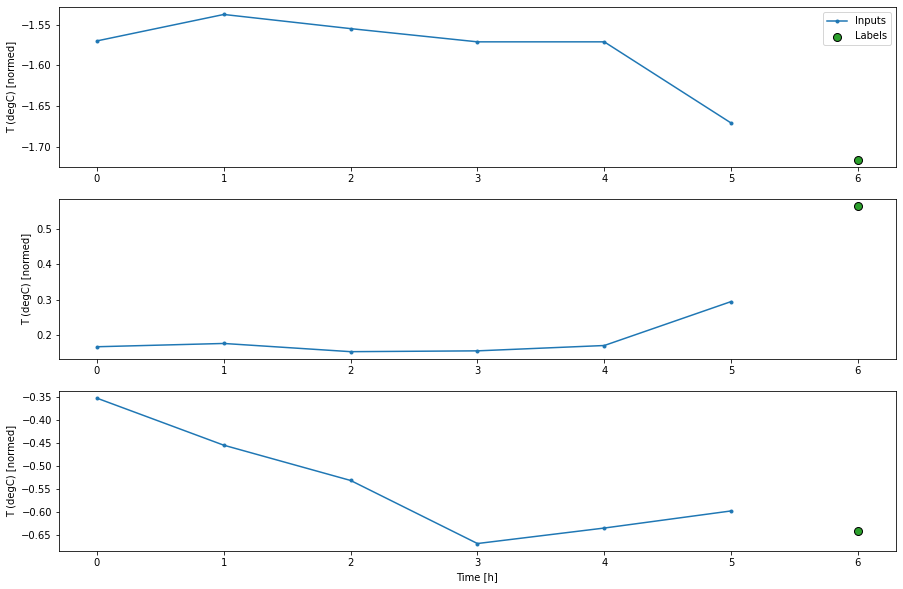

In [ ]:
w2.plot()

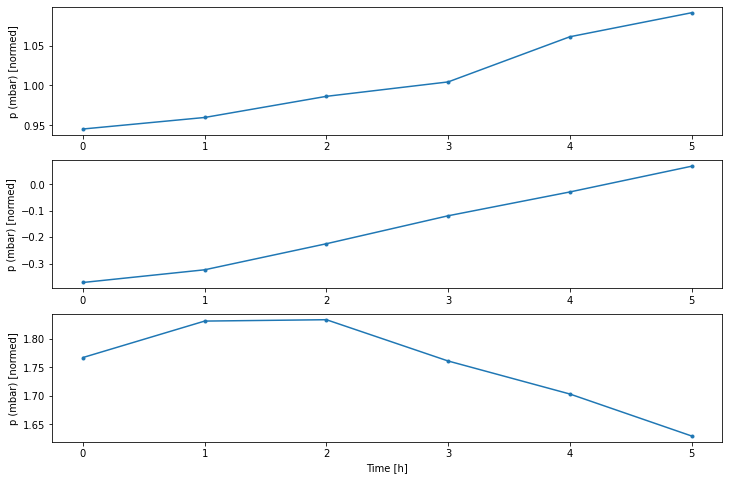

In [ ]:
w2.plot(plot_col='p (mbar)')

In [ ]:
# create tf.data.Datasets
# make_dataset --> take a time sereis dataframe and convert it to a tf.data.Dataset of (input_window, label_window)
# efficiently generate batches of these windows from the training, evaluation and test data using tf.data.Dataset

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(    # Creates a dataset of sliding windows over a timesereis provided as array
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,    #period between successive output sequences
      shuffle=True,       #shuffle output samples
      batch_size=32,)   #number of timesereis samples in each batch

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset


In [ ]:
# add properties for accessing them as tf.data.Dataset using make_dataset method (above)
# add a standard example batch for eady acess and plotting (used in above plot method)
# property --> setters and getters in python

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

# the WindowGenerator object gives you acess to the tf.data.Dataset objects,
# therefore can easily iterate over data

In [ ]:
# Dataset.element_spec --> structure, dtypes and the shapes of the datasets

# (input, label) pairs
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
# Iterating over a dataset yields concrete batches
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


In [ ]:
#LSTM model example

# creates windows of 24 hours of consecutive inputs and labels at a time.
wide_window = WindowGenerator(
    input_width=24,
    label_width=24,
    shift=1,
    label_columns=['T (degC)']
)

wide_window

Total widow size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

In [ ]:
# lstm model
lstm_model = tf.keras.models.Sequential([
                                         # shape [batch, time, features] => [batch, time, lstm_units]
                                         tf.keras.layers.LSTM(32, return_sequences=True),     
                                         # shape => [batch, time, features]
                                         tf.keras.layers.Dense(units=1)
])

# with return_sequence=True, the model can be trained on 24 hours of data at a time
# if false the layer only returns the output of the final time step

In [ ]:
print('Input shape: ', wide_window.example[0].shape)
print('Output shape: ',lstm_model(wide_window.example[0]).shape)

Input shape:  (32, 24, 19)
Output shape:  (32, 24, 1)


In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model,window,patience=2):

  #???
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',       # stop training when monitored metric has stopped improving
                                                    patience=patience,        # no. of epochs with no improvement
                                                    mode='min')               # decreasing order

  #compile the model
  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
  
  #fit the data to the model
  history = model.fit(window.train, 
                      epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  
  return history

In [ ]:
history = compile_and_fit(lstm_model, wide_window)

#IPython.display.clear_output()

val_performance = {}
performance = {}
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/20
1533/1533 [==============================] - 33s 19ms/step - loss: 0.0252 - mean_absolute_error: 0.0896 - val_loss: 0.0065 - val_mean_absolute_error: 0.0568
Epoch 2/20
1533/1533 [==============================] - 37s 24ms/step - loss: 0.0063 - mean_absolute_error: 0.0553 - val_loss: 0.0059 - val_mean_absolute_error: 0.0530
Epoch 3/20
1533/1533 [==============================] - 27s 18ms/step - loss: 0.0059 - mean_absolute_error: 0.0530 - val_loss: 0.0057 - val_mean_absolute_error: 0.0523
Epoch 4/20
1533/1533 [==============================] - 25s 16ms/step - loss: 0.0057 - mean_absolute_error: 0.0520 - val_loss: 0.0057 - val_mean_absolute_error: 0.0524
Epoch 5/20
1533/1533 [==============================] - 24s 16ms/step - loss: 0.0056 - mean_absolute_error: 0.0513 - val_loss: 0.0056 - val_mean_absolute_error: 0.0511
Epoch 6/20
1533/1533 [==============================] - 24s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0509 - val_loss: 0.0056 - val_mean_absolute_error:

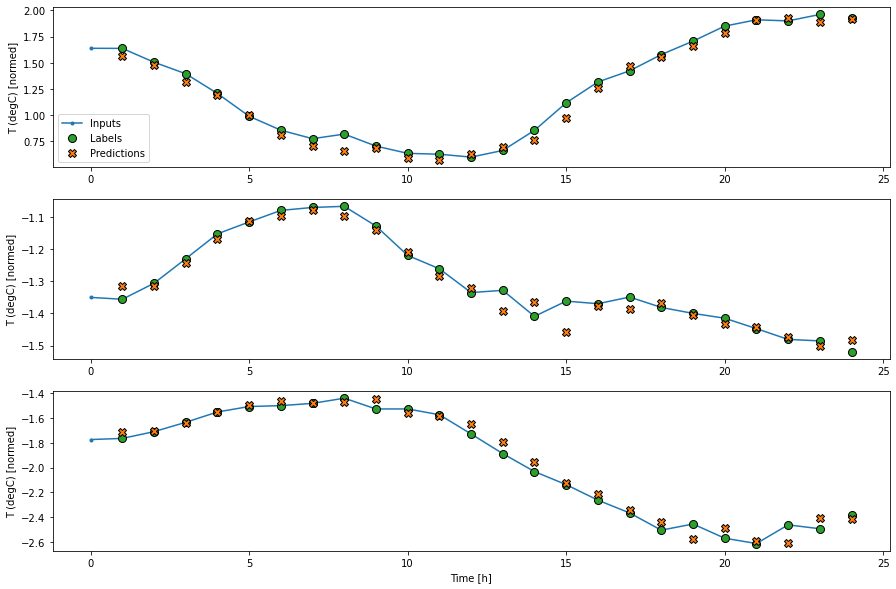

In [ ]:
#plt.figure(figsize=(20,15))
wide_window.plot(lstm_model)